Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [14]:
import pandas as pd
import numpy as np
bike_df_austin = pd.read_csv("bike_df_austin.csv")
foursquare_df = pd.read_csv("df_austin_foursquare_data.csv")
yelp_df = pd.read_csv("df_austin_yelp_data.csv")

merged_df_1 = pd.merge(bike_df_austin, foursquare_df, left_on="ll", right_on="bike_location")
merged_df_2 = pd.merge(bike_df_austin, yelp_df, left_on="ll", right_on="bike_location")
merged_df_2 ["rating"] = merged_df_2["rating"] *2 #to equalize Yelp rating values as Yelp out of 5 and Foursquare our of 10

final_df = pd.concat([merged_df_1, merged_df_2], axis=0)

final_df

,Station_Name,Latitude,Longitude,Number of Bikes,Empty Slots,ll,name,category,latitude,longitude,distance,bike_location,rating,popularity,price,review_count
0,11th/Congress @ The Texas Capitol,30.27260,-97.74127,3,3,"30.2726,-97.74127",Frullati Cafe,Café,30.272569,-97.740990,27.000000,"30.2726,-97.74127",NaN,NaN,NaN,NaN
1,11th/Congress @ The Texas Capitol,30.27260,-97.74127,3,3,"30.2726,-97.74127",Blue Dalilia Bistro,Restaurant,30.272551,-97.740855,40.000000,"30.2726,-97.74127",NaN,NaN,NaN,NaN
2,11th/Congress @ The Texas Capitol,30.27260,-97.74127,3,3,"30.2726,-97.74127",My Thai Mom,Thai Restaurant,30.272121,-97.741543,69.000000,"30.2726,-97.74127",6.4,0.921329,2.0,NaN
3,11th/Congress @ The Texas Capitol,30.27260,-97.74127,3,3,"30.2726,-97.74127",Old Bakery and Emporium,Bakery,30.272121,-97.741543,71.000000,"30.2726,-97.74127",6.8,0.939023,NaN,NaN
4,11th/Congress @ The Texas Capitol,30.27260,-97.74127,3,3,"30.2726,-97.74127",Bob the Baker,Bakery,30.272794,-97.740333,92.000000,"30.2726,-97.74127",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,6th/West,30.27041,-97.75046,4,9,"30.27041,-97.75046",RIO Night Club + Day Club,Dance Clubs,30.270160,-97.749210,127.090595,"30.27041,-97.75046",4.0,NaN,$$,119.0
486,6th/West,30.27041,-97.75046,4,9,"30.27041,-97.75046",Rustic Tap,Cocktail Bars,30.269700,-97.749188,144.073480,"30.27041,-97.75046",7.0,NaN,$$,111.0
487,6th/West,30.27041,-97.75046,4,9,"30.27041,-97.75046",Lola Savannah Coffee Downtown,Coffee & Tea,30.270567,-97.750951,50.270402,"30.27041,-97.75046",7.0,NaN,$$,23.0
488,6th/West,30.27041,-97.75046,4,9,"30.27041,-97.75046",The Original Hoffbrau,Steakhouses,30.269580,-97.749170,144.225801,"30.27041,-97.75046",7.0,NaN,$$,149.0


In [15]:
#equalize data across the two POI sources
final_df["price"] = np.where (final_df["price"] == "$$$", 5,       
np.where (final_df["price"] == "$$", 3.3,
np.where (final_df["price"] == "$", 1.7, final_df["price"]) ))



In [16]:
final_df.to_csv("final_df.csv", index=False)

In [17]:
# Yelp Data not as good so also just merging the Foursquare and Bike Data in case we run models with one dataset
foursquare_merged_data = pd.merge(bike_df_austin, foursquare_df, left_on="ll", right_on="bike_location")


In [18]:
foursquare_merged_data.to_csv("final_foursquare_bike_df.csv", index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

/var/folders/2d/bqz04hdj23l8m45654zxfnl80000gn/T/ipykernel_51251/862866855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df.corr()


<AxesSubplot: >

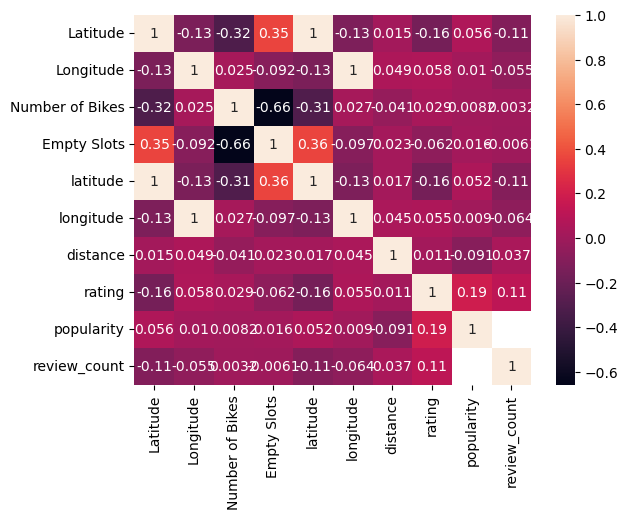

In [20]:
# Create correlation matrix heatmap
corr = final_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [21]:
# heatmap revealed I had duplicate lattitude and longitude columns so need to drop.
final_df_v2 = final_df.drop(["Longitude", "Latitude"], axis=1)
final_df_v2


,Station_Name,Number of Bikes,Empty Slots,ll,name,category,latitude,longitude,distance,bike_location,rating,popularity,price,review_count
0,11th/Congress @ The Texas Capitol,3,3,"30.2726,-97.74127",Frullati Cafe,Café,30.272569,-97.740990,27.000000,"30.2726,-97.74127",NaN,NaN,NaN,NaN
1,11th/Congress @ The Texas Capitol,3,3,"30.2726,-97.74127",Blue Dalilia Bistro,Restaurant,30.272551,-97.740855,40.000000,"30.2726,-97.74127",NaN,NaN,NaN,NaN
2,11th/Congress @ The Texas Capitol,3,3,"30.2726,-97.74127",My Thai Mom,Thai Restaurant,30.272121,-97.741543,69.000000,"30.2726,-97.74127",6.4,0.921329,2.0,NaN
3,11th/Congress @ The Texas Capitol,3,3,"30.2726,-97.74127",Old Bakery and Emporium,Bakery,30.272121,-97.741543,71.000000,"30.2726,-97.74127",6.8,0.939023,NaN,NaN
4,11th/Congress @ The Texas Capitol,3,3,"30.2726,-97.74127",Bob the Baker,Bakery,30.272794,-97.740333,92.000000,"30.2726,-97.74127",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,6th/West,4,9,"30.27041,-97.75046",RIO Night Club + Day Club,Dance Clubs,30.270160,-97.749210,127.090595,"30.27041,-97.75046",4.0,NaN,3.3,119.0
486,6th/West,4,9,"30.27041,-97.75046",Rustic Tap,Cocktail Bars,30.269700,-97.749188,144.073480,"30.27041,-97.75046",7.0,NaN,3.3,111.0
487,6th/West,4,9,"30.27041,-97.75046",Lola Savannah Coffee Downtown,Coffee & Tea,30.270567,-97.750951,50.270402,"30.27041,-97.75046",7.0,NaN,3.3,23.0
488,6th/West,4,9,"30.27041,-97.75046",The Original Hoffbrau,Steakhouses,30.269580,-97.749170,144.225801,"30.27041,-97.75046",7.0,NaN,3.3,149.0


/var/folders/2d/bqz04hdj23l8m45654zxfnl80000gn/T/ipykernel_51251/2480374590.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df_v2.corr()


<AxesSubplot: >

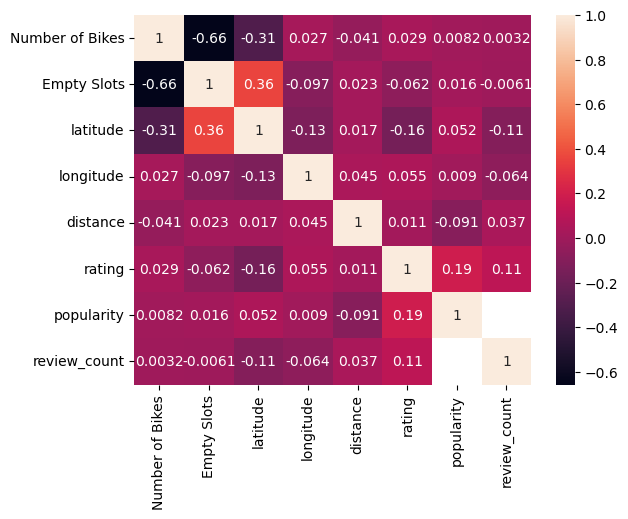

In [22]:
# re-create heatmap with dupolicate columns dropped
corr = final_df_v2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [52]:
#unsuprisingly there seems to be a decently strong negative correlation between the number of bikes and empty slots
#no other strong correlation seems to show


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

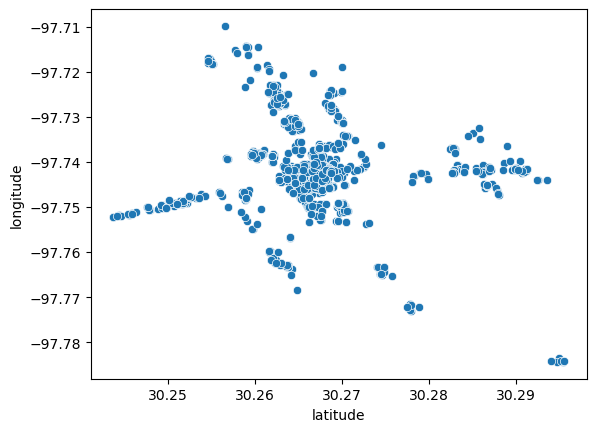

In [23]:
# create scatterplot to see if shape of stations matches map of Austin as I wanted to run a scatterplot and correlation is too low to plot anything meaningful. Fun scatterplot below.

sns.scatterplot(x="latitude", y="longitude", data=final_df_v2)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [24]:
import sqlite3
connection = sqlite3.connect("/Users/magnesium/Documents/Light House Labs Bootcamp/W03/Project_2_Statistical_Modelling/Lighthouse_Statistical_Modelling_Project/notebooks/bike_data_base.db")
final_df_v2.to_sql("bike_data_base", connection, if_exists="replace")
connection.close()

Look at the data before and after the join to validate your data.

In [ ]:
# data looks good. Seems like the joins worked well after the joins and removing the duplicate columns.